In [ ]:
import numpy as np

# importing the required module
# TODO: Use other plotting library instead?
import matplotlib.pyplot as plt


In [65]:
# Set parameters
T=100

#Generate timeline

t = np.arange(0,T,1,dtype=int)

# Set std and switching probability

var_errors = 30
p = 0.5

# Generate (stochastic) trend:

seed = 12345

rng = np.random.default_rng(seed)
draw_rand_bin = rng.binomial(1, p, size=None)

errors = rng.normal(0, var_errors, T)




# Set the trend component
c = .5

# Generate trend shift (first up, then down, or vice versa)

trend = np.array([0,0])

if draw_rand_bin == 0:
    trend = np.array([c,-c])
elif draw_rand_bin == 1:
    trend = np.array([c,-c])    


# Determine whether there is a trend shift
# For shift at t=0, this is equivalent to no shift (i.e., second part of trend is used throughout).

# Set up shifting probabilities
p_shift_at_0 = 0.5

equal_prob_t80= (1-  p_shift_at_0) / (79)

p_shift_at_t = np.full(80, equal_prob_t80)


p_shift_at_t[0] = p_shift_at_0

p_shift_at_t

check_sum = np.sum(p_shift_at_t)
# check_sum

In [77]:
trend_shift = np.random.choice(80, size=None, replace=True, p=p_shift_at_t.tolist())

# trend_shift

15

In [86]:

trend_shift = np.random.choice(80, size=None, replace=True)

trend_shift

# generate trend vector including shift

trend_with_shift = np.full(100,c)
for i in range(0,100):
    if i <= trend_shift:
        trend_with_shift[i] = trend[0]
    elif i > trend_shift:
        trend_with_shift[i] = trend[1]

trend_with_shift


# run cumulative trend, errors

cum_sum_trend = np.cumsum(trend_with_shift)

cum_sum_errors = np.cumsum(errors)

y = cum_sum_trend + cum_sum_errors





array([  38.41185374,   12.79200161,    5.51680456,    2.75650535,
        -19.97003422,  -61.50381527,  -42.5370312 ,  -32.20528781,
        -91.2911797 ,  -21.36889007,    7.1860171 ,  -16.09559831,
         10.47034992,   -4.03824528,   -6.35893085,   16.80639949,
        -21.39364451,   -4.61791907,   36.85145077,   76.02039259,
         66.52943713,   93.11701737,   43.96953535,   38.72385753,
         51.70837549,   10.90034332,    7.9497156 ,   59.19191357,
        137.23669636,  160.05753667,  184.41653254,  155.14688315,
        118.36523454,   75.49647413,   91.24287903,  113.3010609 ,
         93.03825131,   55.67800174,   62.90473479,   71.79182235,
         67.36747164,  104.96696525,  101.67809152,   99.19356485,
         65.44713084,   69.02583636,  108.93816928,  110.27248991,
        111.89992792,  124.40956403,  132.23407383,  147.64164543,
        163.2432745 ,  181.29377495,  156.94325126,  165.44417965,
        116.86313189,  124.36709678,   86.01838333,   83.38025

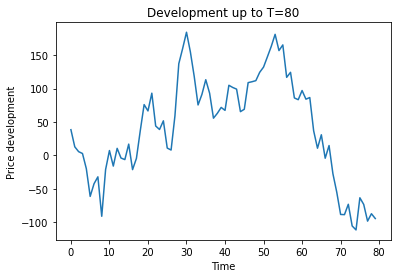

In [93]:


# TODO: Get good handle on plotting.
# Currently using matplotlib


 
# plotting the points
plt.plot(t[0:80], y[0:80])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Price development up to Forecasting range')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()

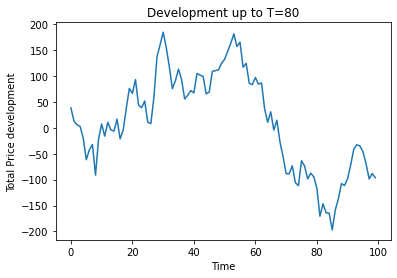

In [94]:
# plotting the points
plt.plot(t[0:100], y[0:100])
 
# naming the x axis
plt.xlabel('Time')
# naming the y axis
plt.ylabel('Total Price development')
 
# giving a title to my graph
plt.title('Development up to T=80')
 
# function to show the plot
plt.show()